<a href="https://colab.research.google.com/github/LelyshB/Car_price_predict/blob/main/Car_price_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://drive.google.com/file/d/1gSobTzFm74pf_hTHZBPoGJOjL32BEFSQ/view?usp=sharing

In [2]:
pip install --upgrade gdown

  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3


In [3]:
! gdown 1gSobTzFm74pf_hTHZBPoGJOjL32BEFSQ

Downloading...
From: https://drive.google.com/uc?id=1gSobTzFm74pf_hTHZBPoGJOjL32BEFSQ
To: /content/carprice.zip
100% 1.15M/1.15M [00:00<00:00, 88.6MB/s]


In [4]:
! unzip /content/carprice.zip

Archive:  /content/carprice.zip
  inflating: audi.csv                
  inflating: bmw.csv                 
  inflating: cclass.csv              
  inflating: focus.csv               
  inflating: ford.csv                
  inflating: hyundi.csv              
  inflating: merc.csv                
  inflating: skoda.csv               
  inflating: toyota.csv              
  inflating: unclean cclass.csv      
  inflating: unclean focus.csv       
  inflating: vauxhall.csv            
  inflating: vw.csv                  


In [37]:
! pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 4.0 MB/s eta 0:00:00


In [5]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 6.6 MB/s eta 0:00:00


In [42]:
from sklearn.metrics import adjusted_rand_score, mutual_info_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.cluster import KMeans

from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV
from catboost import CatBoostRegressor

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import shap

In [7]:
df = pd.read_csv('/content/ford.csv')

# Знакомство с данным

In [8]:
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17960,Fiesta,2016,7999,Manual,31348,Petrol,125,54.3,1.2
17961,B-MAX,2017,8999,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,7499,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6


In [9]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,17965.000000,17965.000000,17965.000000,17965.000000,17965.000000,17965.000000
mean,2016.866574,12279.756415,23363.630504,113.334539,57.906991,1.350827
std,2.050346,4741.382606,19472.114690,62.010438,10.125977,0.432371
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18243.000000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31064.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


In [10]:
df.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

# Проверка корреляций в данных

<ipython-input-43-91ab4c9edd27>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

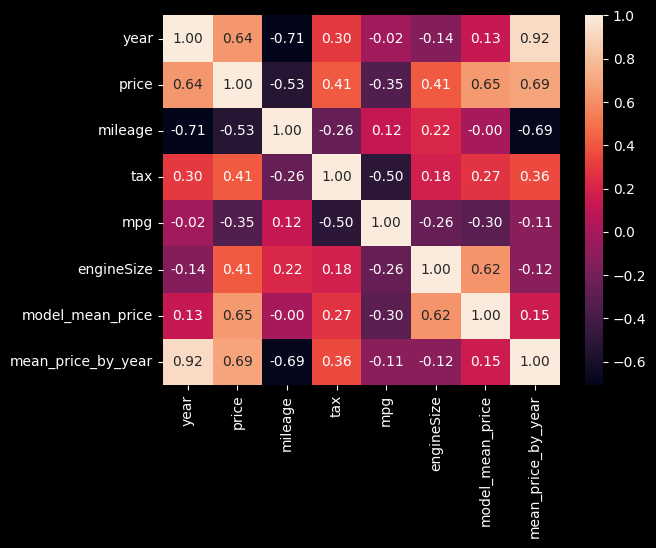

In [43]:
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f")

# Создаем дополнительные фичи

In [12]:
model_mean_price = df.groupby('model')['price'].mean().reset_index()
model_mean_price.columns = ['model', 'model_mean_price']

df = pd.merge(df, model_mean_price, on='model', how='left')

In [13]:
mean_price_by_year = df.groupby('year')['price'].mean().reset_index()
mean_price_by_year.columns = ['year', 'mean_price_by_year']

df = pd.merge(df, mean_price_by_year, on='year', how='left')

In [14]:
df.sample(5)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,model_mean_price,mean_price_by_year
11053,Kuga,2018,16794,Manual,25000,Diesel,145,60.1,2.0,15823.472360,13157.894619
7115,Fiesta,2016,6491,Manual,24587,Petrol,125,54.3,1.2,10196.298002,10665.668812
15273,Focus,2019,17989,Automatic,15623,Diesel,145,74.3,1.5,13185.882956,17176.449280
3791,Kuga,2017,15790,Manual,5509,Diesel,145,60.1,2.0,15823.472360,11965.689853
17106,Fiesta,2015,8000,Manual,14100,Petrol,0,65.7,1.0,10196.298002,8778.168252


# **Cross Validation**

In [15]:
X = df.drop(['price','model','transmission','fuelType'], axis=1)
y = df['price']

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
models = [
    LinearRegression(),
    RandomForestRegressor(),
    GradientBoostingRegressor()
]

In [18]:
results_df = pd.DataFrame(columns=['Model', 'Mean MSE', 'Std MSE', 'Mean MAE', 'Std MAE', 'Mean R^2', 'Std R^2'])

In [19]:
for model in models:
    mse_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
    mean_mse = -mse_scores.mean()
    std_mse = mse_scores.std()

    mae_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='neg_mean_absolute_error')
    mean_mae = -mae_scores.mean()
    std_mae = mae_scores.std()

    r2_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='r2')
    mean_r2 = r2_scores.mean()
    std_r2 = r2_scores.std()

    results_df = results_df.append({'Model': model.__class__.__name__,
                                    'Mean MSE': mean_mse,
                                    'Std MSE': std_mse,
                                    'Mean MAE': mean_mae,
                                    'Std MAE': std_mae,
                                    'Mean R^2': mean_r2,
                                    'Std R^2': std_r2}, ignore_index=True)

<ipython-input-19-c4de64be5a9b>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': model.__class__.__name__,
<ipython-input-19-c4de64be5a9b>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': model.__class__.__name__,
<ipython-input-19-c4de64be5a9b>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': model.__class__.__name__,


In [20]:
results_df

,Model,Mean MSE,Std MSE,Mean MAE,Std MAE,Mean R^2,Std R^2
0,LinearRegression,3.507247e+06,492415.882427,1373.484988,51.737287,0.838373,0.008365
1,RandomForestRegressor,1.700984e+06,266964.653335,907.417463,48.348036,0.922626,0.003838
2,GradientBoostingRegressor,1.802582e+06,375315.086363,948.091011,57.433901,0.917615,0.007300


**Случайный лес оказался наилучшим вариантом, поэтому фитим в него всю выборку**

In [21]:
train, test = train_test_split(df,train_size=0.8,random_state=42)

In [22]:
X_train = train.drop(['price','model','fuelType','transmission'], axis=1)
y_train = train['price']

X_test = test.drop(['price','model','fuelType','transmission'], axis=1)
y_test = test['price']

In [23]:
random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

In [24]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R^2 Score:", r2)

Mean Squared Error (MSE): 1559946.770500699
Mean Absolute Error (MAE): 862.0661677257631
R^2 Score: 0.9302920979903176


# **Catboost**

In [25]:
train, test = train_test_split(df,train_size=0.6,random_state=42)

val, test = train_test_split(test,train_size=0.5,random_state=42)

In [26]:
X = ['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize','model_mean_price','mean_price_by_year']

cat_features = ['model', 'transmission', 'fuelType']

y = ['price']

In [27]:
parameters = {'cat_features': cat_features,
              'eval_metric': 'MAPE',
              'learning_rate': 0.08,
              'random_seed':42,
              'verbose':100}

In [28]:
model = CatBoostRegressor(**parameters)

In [29]:
model.fit(train[X],train[y],eval_set=(val[X],val[y]))

0:	learn: 0.3637301	test: 0.3654584	best: 0.3654584 (0)	total: 70.9ms	remaining: 1m 10s
100:	learn: 0.0765640	test: 0.0778798	best: 0.0778798 (100)	total: 1.12s	remaining: 9.99s
200:	learn: 0.0700984	test: 0.0722594	best: 0.0722594 (200)	total: 2.13s	remaining: 8.46s
300:	learn: 0.0672083	test: 0.0703758	best: 0.0703758 (300)	total: 3.13s	remaining: 7.26s
400:	learn: 0.0654854	test: 0.0694980	best: 0.0694980 (400)	total: 4.09s	remaining: 6.11s
500:	learn: 0.0641917	test: 0.0688890	best: 0.0688890 (500)	total: 5.07s	remaining: 5.05s
600:	learn: 0.0629860	test: 0.0684509	best: 0.0684477 (599)	total: 6.09s	remaining: 4.04s
700:	learn: 0.0620846	test: 0.0680947	best: 0.0680947 (700)	total: 7.06s	remaining: 3.01s
800:	learn: 0.0612913	test: 0.0678909	best: 0.0678865 (798)	total: 8.06s	remaining: 2s
900:	learn: 0.0606597	test: 0.0677393	best: 0.0677393 (900)	total: 9.83s	remaining: 1.08s
999:	learn: 0.0600115	test: 0.0675680	best: 0.0675639 (993)	total: 11.4s	remaining: 0us

bestTest = 0.067

In [30]:
test['price_pred'] = model.predict(test[X])

In [31]:
def error(y_true,y_pred):
  print('"Mean Squared Error (MSE):"',mean_squared_error(y_true,y_pred))
  print('"Mean Squared Error (MAE):"',mean_absolute_error(y_true,y_pred))
  print('"R^2 score:"',r2_score(y_true, y_pred))

error(test['price'],test['price_pred'])

"Mean Squared Error (MSE):" 1229372.4615310512
"Mean Squared Error (MAE):" 804.9357945332318
"R^2 score:" 0.9462597505334905


Catboost показывает лучшие метрики, поэтому оставляем его

In [45]:
feature_importances = random_forest.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

cm = sns.dark_palette("blue", as_cmap=True)
feature_importance_df.style.background_gradient(cmap=cm,subset='Importance')

,Feature,Importance
6,mean_price_by_year,0.352952
4,engineSize,0.219003
5,model_mean_price,0.168270
0,year,0.125565
1,mileage,0.074031
3,mpg,0.050598
2,tax,0.009580


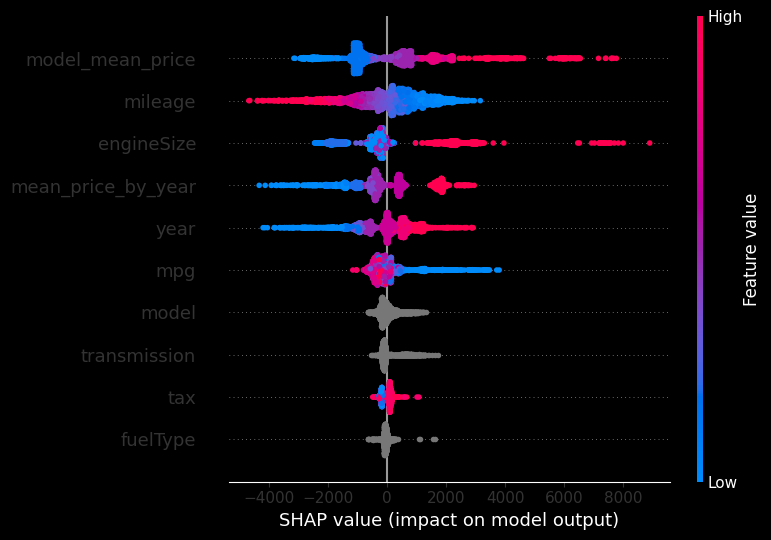

In [71]:
plt.style.use('dark_background')

explainer = shap.TreeExplainer(model)

shap_values = explainer.shap_values(val[X])

shap.summary_plot(shap_values, val[X])